In [1]:
%matplotlib inline


# Convolutional Wasserstein Barycenter example


This example is designed to illustrate how the Convolutional Wasserstein Barycenter
function of POT works.



In [2]:
# Author: Nicolas Courty <ncourty@irisa.fr>
#
# License: MIT License


import numpy as np
import pylab as pl
import ot

Data preparation
----------------

The four distributions are constructed from 4 simple images



In [3]:
f1 = 1 - pl.imread('../data/redcross.png')[:, :, 2]
f2 = 1 - pl.imread('../data/duck.png')[:, :, 2]
f3 = 1 - pl.imread('../data/heart.png')[:, :, 2]
f4 = 1 - pl.imread('../data/tooth.png')[:, :, 2]

A = []
f1 = f1 / np.sum(f1)
f2 = f2 / np.sum(f2)
f3 = f3 / np.sum(f3)
f4 = f4 / np.sum(f4)
A.append(f1)
A.append(f2)
A.append(f3)
A.append(f4)
A = np.array(A)

nb_images = 5

# those are the four corners coordinates that will be interpolated by bilinear
# interpolation
v1 = np.array((1, 0, 0, 0))
v2 = np.array((0, 1, 0, 0))
v3 = np.array((0, 0, 1, 0))
v4 = np.array((0, 0, 0, 1))

Barycenter computation and visualization
----------------------------------------




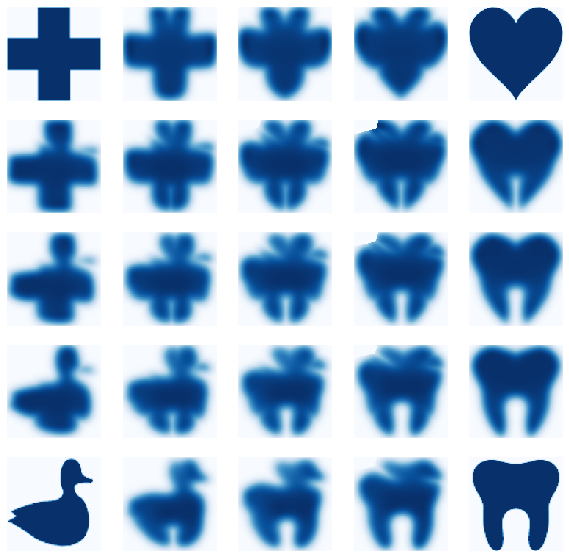

In [4]:
pl.figure(figsize=(10, 10))
pl.title('Convolutional Wasserstein Barycenters in POT')
cm = 'Blues'
# regularization parameter
reg = 0.004
for i in range(nb_images):
    for j in range(nb_images):
        pl.subplot(nb_images, nb_images, i * nb_images + j + 1)
        tx = float(i) / (nb_images - 1)
        ty = float(j) / (nb_images - 1)

        # weights are constructed by bilinear interpolation
        tmp1 = (1 - tx) * v1 + tx * v2
        tmp2 = (1 - tx) * v3 + tx * v4
        weights = (1 - ty) * tmp1 + ty * tmp2

        if i == 0 and j == 0:
            pl.imshow(f1, cmap=cm)
            pl.axis('off')
        elif i == 0 and j == (nb_images - 1):
            pl.imshow(f3, cmap=cm)
            pl.axis('off')
        elif i == (nb_images - 1) and j == 0:
            pl.imshow(f2, cmap=cm)
            pl.axis('off')
        elif i == (nb_images - 1) and j == (nb_images - 1):
            pl.imshow(f4, cmap=cm)
            pl.axis('off')
        else:
            # call to barycenter computation
            pl.imshow(ot.bregman.convolutional_barycenter2d(A, reg, weights), cmap=cm)
            pl.axis('off')
pl.show()